In [132]:
#required module
import pandas as pd
from bs4 import BeautifulSoup
import requests


In [133]:
#url setting
dc_url = "https://gall.dcinside.com/board/lists"
headers = [
    {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit'}]


In [134]:
#list setting
title_list = []
writer_list = []
ip_list = []
date_list = []

In [135]:
#crawling
for i in range(1, 170):
    params = {'id': 'japan_entertainment', 'page': i}
    response = requests.get(dc_url, params=params, headers=headers[0])
    soup = BeautifulSoup(response.content, 'html.parser')
    article_list = soup.find('tbody').find_all('tr')

    for tr_item in article_list:
        
        date_tag = tr_item.find('td', class_='gall_date')
        date_dict = date_tag.attrs
        if len(date_dict) == 2:
            date_list.append(date_dict['title'])
        else:
            date_list.append(date_tag.text)
       
        title_tag = tr_item.find('a', href=True)
        title = title_tag.text
        #print("제목: ", title)
        title_list.append(title)

        writer_tag = tr_item.find(
            'td', class_='gall_writer ub-writer').find('span', class_='nickname')
        if writer_tag is not None:
            writer = writer_tag.text
            #print("글쓴이: ", writer)
            writer_list.append(writer)
        else:
            #print("글쓴이: ", "없음")
            writer_list.append('없음')

In [136]:
#DataFrame Conversion : Date
date_df = pd.DataFrame(date_list)
#date_df
cfm_date_df = date_df.drop(index=[0], axis=0)
index_num_range = list(range(len(date_list) - 1))
#print(index_num_range)
cfm_date_df.index = index_num_range
cfm_date_df.columns = ['Date']
print(cfm_date_df)
#cfm_titles_df.shape


                     Date
0     2022-02-20 23:40:10
1     2022-02-20 23:40:08
2     2022-02-20 23:39:44
3     2022-02-20 23:38:23
4     2022-02-20 23:38:09
...                   ...
8444  2022-02-13 12:25:19
8445  2022-02-13 12:21:30
8446  2022-02-13 12:21:25
8447  2022-02-13 12:19:03
8448  2022-02-13 12:15:57

[8449 rows x 1 columns]


In [137]:
#DataFrame Conversion : Title
titles_df = pd.DataFrame(title_list)
cfm_titles_df = titles_df.drop(index=[0], axis=0)
index_num_range = list(range(len(title_list) - 1))
#print(index_num_range)
cfm_titles_df.index = index_num_range
cfm_titles_df.columns = ['Title']
print(cfm_titles_df)
#cfm_titles_df.shape

                                       Title
0                    제발 우리 사야 선발 좀 들어왔으면 좋겠어
1                        중연)틀깅이 언더ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2     중연) 이재명 당선ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
3                       중연)튼튼이 짭깅이 언더ㅋㅋㅋㅋㅋㅋㅋ
4              중연) 와호 노기 이적 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
...                                      ...
8444                                이게 아이돌임?
8445                              이재명 후보 등록함
8446                    점순이가 먹다 남긴 샌드위치 먹고싶다
8447                               와 심각하다 진자
8448                             점순이 요청gif 짤

[8449 rows x 1 columns]


In [138]:
#DataFrame Conversion - Writer
writers_df = pd.DataFrame(writer_list)
cfm_writers_df = writers_df.drop(index=[0], axis = 0)
index_num_range = list(range(len(writer_list) - 1))
#print(index_num_range)
cfm_writers_df.index = index_num_range
cfm_writers_df.columns = ['Writer']
print(cfm_writers_df)


         Writer
0            ㅇㅇ
1        헤이세이레이
2       아키모토마나츠
3            강외
4            ㄹㄴ
...         ...
8444        타쿠우
8445         ㅇㅇ
8446  콩케는1열이딱이야
8447        타쿠우
8448         ㅇㅇ

[8449 rows x 1 columns]


In [139]:
final_df = pd.concat([cfm_date_df, cfm_writers_df, cfm_titles_df], axis = 1)
final_df

,Date,Writer,Title
0,2022-02-20 23:40:10,ㅇㅇ,제발 우리 사야 선발 좀 들어왔으면 좋겠어
1,2022-02-20 23:40:08,헤이세이레이,중연)틀깅이 언더ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2,2022-02-20 23:39:44,아키모토마나츠,중연) 이재명 당선ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
3,2022-02-20 23:38:23,강외,중연)튼튼이 짭깅이 언더ㅋㅋㅋㅋㅋㅋㅋ
4,2022-02-20 23:38:09,ㄹㄴ,중연) 와호 노기 이적 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
...,...,...,...
8444,2022-02-13 12:25:19,타쿠우,이게 아이돌임?
8445,2022-02-13 12:21:30,ㅇㅇ,이재명 후보 등록함
8446,2022-02-13 12:21:25,콩케는1열이딱이야,점순이가 먹다 남긴 샌드위치 먹고싶다
8447,2022-02-13 12:19:03,타쿠우,와 심각하다 진자


In [140]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] =final_df['Date'].dt.month
final_df['Day'] = final_df['Date'].dt.day
final_df = final_df.drop(['Date', 'Year', 'Month'], axis=1)

In [141]:
final_df.set_index(final_df['Day'])
final_df

,Writer,Title,Day
0,ㅇㅇ,제발 우리 사야 선발 좀 들어왔으면 좋겠어,20
1,헤이세이레이,중연)틀깅이 언더ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,20
2,아키모토마나츠,중연) 이재명 당선ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,20
3,강외,중연)튼튼이 짭깅이 언더ㅋㅋㅋㅋㅋㅋㅋ,20
4,ㄹㄴ,중연) 와호 노기 이적 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,20
...,...,...,...
8444,타쿠우,이게 아이돌임?,13
8445,ㅇㅇ,이재명 후보 등록함,13
8446,콩케는1열이딱이야,점순이가 먹다 남긴 샌드위치 먹고싶다,13
8447,타쿠우,와 심각하다 진자,13


In [160]:
import numpy as np

friday_df = final_df[final_df.Day == 18]
friday_df

,Writer,Title,Day
2620,Autaquway,근데 뭐 메세지 46시간이랑 연동기획 한다면서,18
2621,꾸라단대리,5기 메세지도 22일 동시시작?,18
2622,히나리리즈키,도네용 홍준표 2번이 어디서나오나했더니,18
2623,스즈몽,이제부터 모바메 거리는 애들 양민충으로 간주하면 되는거냐?,18
2624,Autaquway,돈계산 해보니 2명 찍먹될듯,18
...,...,...,...
3598,ㅇㅇ,곤조 죽음?,18
3599,카키단,5기 다음 영상은 기대가 안됨,18
3600,조지-베스트,오늘은 무슨 날?,18
3601,아123,기여운 히나쟝 보고 자라,18


In [161]:
finalized_df = friday_df.replace('ㅇㅇ', np.nan)

In [162]:
finalized_df

,Writer,Title,Day
2620,Autaquway,근데 뭐 메세지 46시간이랑 연동기획 한다면서,18
2621,꾸라단대리,5기 메세지도 22일 동시시작?,18
2622,히나리리즈키,도네용 홍준표 2번이 어디서나오나했더니,18
2623,스즈몽,이제부터 모바메 거리는 애들 양민충으로 간주하면 되는거냐?,18
2624,Autaquway,돈계산 해보니 2명 찍먹될듯,18
...,...,...,...
3598,NaN,곤조 죽음?,18
3599,카키단,5기 다음 영상은 기대가 안됨,18
3600,조지-베스트,오늘은 무슨 날?,18
3601,아123,기여운 히나쟝 보고 자라,18


In [214]:
plot_df = finalized_df.dropna(axis=0)

In [215]:
plot_df

,Writer,Title,Day
2620,Autaquway,근데 뭐 메세지 46시간이랑 연동기획 한다면서,18
2621,꾸라단대리,5기 메세지도 22일 동시시작?,18
2622,히나리리즈키,도네용 홍준표 2번이 어디서나오나했더니,18
2623,스즈몽,이제부터 모바메 거리는 애들 양민충으로 간주하면 되는거냐?,18
2624,Autaquway,돈계산 해보니 2명 찍먹될듯,18
...,...,...,...
3597,꾸코,야쿠보상 유루시떼쿠다사이,18
3599,카키단,5기 다음 영상은 기대가 안됨,18
3600,조지-베스트,오늘은 무슨 날?,18
3601,아123,기여운 히나쟝 보고 자라,18


In [216]:
plot_df.drop('Title', axis = 1)

,Writer,Day
2620,Autaquway,18
2621,꾸라단대리,18
2622,히나리리즈키,18
2623,스즈몽,18
2624,Autaquway,18
...,...,...
3597,꾸코,18
3599,카키단,18
3600,조지-베스트,18
3601,아123,18


In [228]:
plot_df.value_counts('Writer')

Writer
HINATA46     81
조내성          59
이와테토끼        48
Autaquway    44
민식           37
             ..
떨거지           1
이노우에나기        1
렉카            1
링고.           1
天照            1
Length: 88, dtype: int64

In [250]:
freq_list = []
freq_list.append(plot_df.value_counts('Writer'))
freq_list
type(freq_list)

list

In [252]:
freq_list_df = pd.DataFrame(freq_list)
freq_list_df

Writer,HINATA46,조내성,이와테토끼,Autaquway,민식,아키모토마나츠,강외,꾸라단대리,유리나리,요군,...,.6카,고사유링,카미사마께BAN당해서의문인룬룬,꺼츠,주간문춘,떨거지,이노우에나기,렉카,링고.,天照
0,81,59,48,44,37,32,31,29,28,28,...,1,1,1,1,1,1,1,1,1,1


In [253]:
freq_list_df.transpose()

,0
Writer,
HINATA46,81
조내성,59
이와테토끼,48
Autaquway,44
민식,37
...,...
떨거지,1
이노우에나기,1
렉카,1


In [258]:
freq_df = freq_list_df.transpose()
freq_df

,0
Writer,
HINATA46,81
조내성,59
이와테토끼,48
Autaquway,44
민식,37
...,...
떨거지,1
이노우에나기,1
렉카,1


In [259]:
freq_df.reset_index()

,Writer,0
0,HINATA46,81
1,조내성,59
2,이와테토끼,48
3,Autaquway,44
4,민식,37
...,...,...
83,떨거지,1
84,이노우에나기,1
85,렉카,1
86,링고.,1


In [261]:
freq_df.columns = ['Counts']

In [262]:
freq_df

,Counts
Writer,
HINATA46,81
조내성,59
이와테토끼,48
Autaquway,44
민식,37
...,...
떨거지,1
이노우에나기,1
렉카,1


In [263]:
final_freq_df = freq_df.reset_index()

In [264]:
final_freq_df

,Writer,Counts
0,HINATA46,81
1,조내성,59
2,이와테토끼,48
3,Autaquway,44
4,민식,37
...,...,...
83,떨거지,1
84,이노우에나기,1
85,렉카,1
86,링고.,1


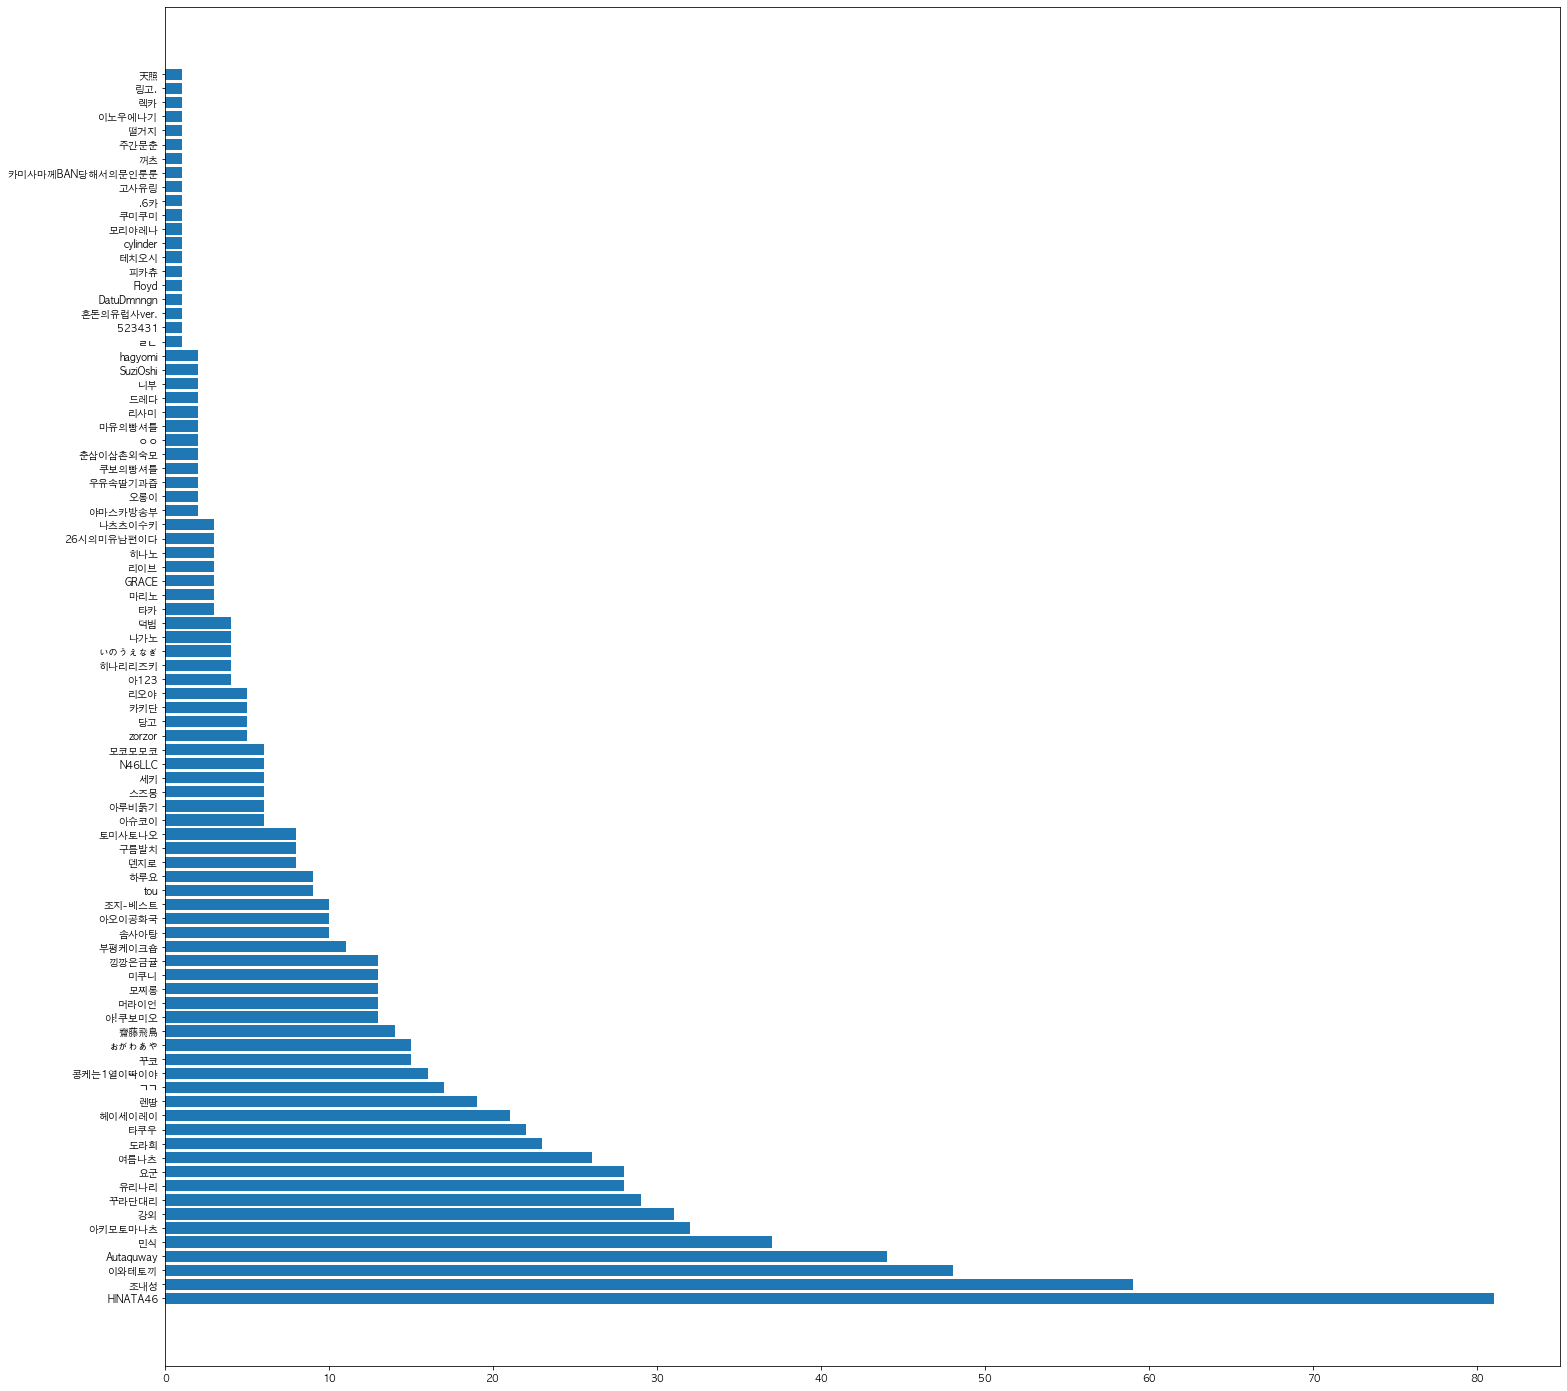

<Figure size 432x288 with 0 Axes>

In [281]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(25, 25))
plt.barh(final_freq_df['Writer'], final_freq_df['Counts'])
plt.show()
plt.tight_layout()
